In [1]:
from ugropy import abdulelah_gani_s, abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(221, 350, 130, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [3]:
for idx, smiles in enumerate(df.index):
    try:
        solution = abdulelah_gani_s.get_groups(smiles, "smiles")
    except Exception as e:
        print(smiles, idx)
        raise e

    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles]
    if isinstance(row, pd.DataFrame):
        row = row.iloc[0]
    row = row[row != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()

    # Verificar si ninguna solución tiene subgroups_numbers igual a row_dict
    if solution.subgroups_numbers != row_dict:
        print(smiles)
        print(idx)
        print("Subgrupos:")
        print(str(solution.subgroups))  # Convertir a string y unir con saltos de línea
        print("Subgrupos por número:")
        print(str(solution.subgroups_numbers))  # Convertir a string y unir con saltos de línea
        print("Gani: ")
        print(row_dict)
        
        gani_groups = {}
        for group, ocurr in row_dict.items():
            group_name = abdulelah_gani_s.subgroups_info.loc[abdulelah_gani_s.subgroups_info["group_number"] == group].index[0]
            gani_groups[group_name] = ocurr
            
        print("Gani group names:")
        print(gani_groups)
        
        wrong_smiles = smiles
        break

In [4]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

abdulelah_gani_s.detect_fragments(mol)

NameError: name 'wrong_smiles' is not defined

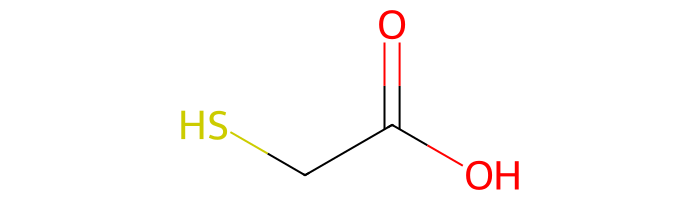

In [5]:
sol = abdulelah_gani_s.get_groups(wrong_smiles, "smiles")

sol.draw(width=700)

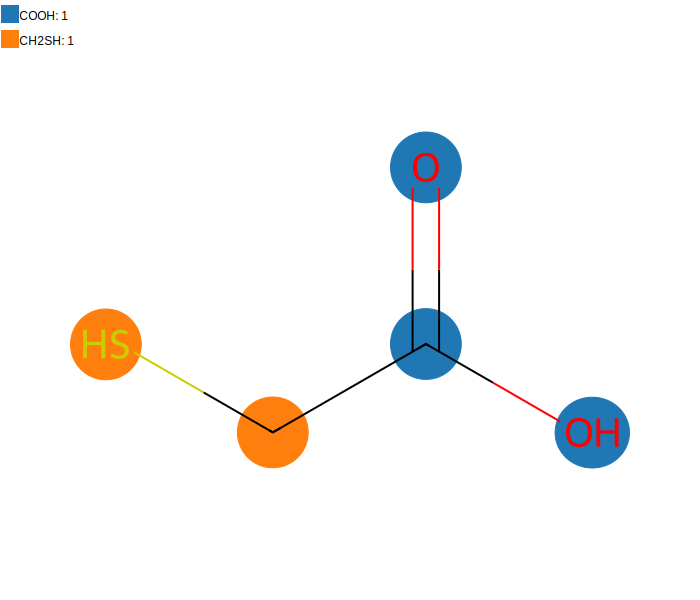

In [6]:
abdulelah_gani_p.get_groups(wrong_smiles, "smiles").draw(width=700, height=600)

1


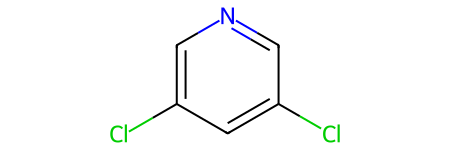

In [ ]:
idx = 1

ocurr = df[df[341]>0][341].values[idx]
print(ocurr)
smiles = df[df[341]>0].index[idx]

mol = instantiate_mol_object(smiles, "smiles")

mol

In [8]:
column_sums = df.sum()

# Identificar columnas cuya suma es igual a 0
columns_with_zero_sum = column_sums[column_sums == 0].index.tolist()

In [9]:
columns_with_zero_sum

[225, 238, 256, 264, 276, 280, 308, 314, 342]